In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn import datasets
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import GridSearchCV, cross_val_predict, cross_val_score
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import confusion_matrix, precision_recall_curve, precision_score, recall_score, accuracy_score, roc_auc_score, roc_curve, classification_report
%matplotlib inline

In [2]:
mnist = datasets.fetch_openml('mnist_784', version=1)

In [3]:
X, y = mnist['data'], mnist['target']
y = y.astype(np.uint8)
X_train, y_train, X_test, y_test = X[:60000], y[:60000], X[60000:], y[60000:]

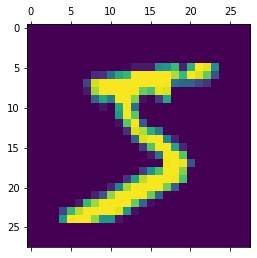

In [13]:
plt.matshow(X_train.iloc[0].values.reshape(28,28))

In [4]:
std_scaler = StandardScaler().fit(X_train)
X_train = std_scaler.transform(X_train)

### KNN Clf

In [23]:
params = {'n_neighbors':[1, 2, 3, 4, 5], 'weights':['uniform', 'distance']}
knn_model = KNeighborsClassifier()

grid_cv = GridSearchCV(knn_model, params, cv=5)
grid_cv.fit(X_train, y_train)


GridSearchCV(cv=5, estimator=KNeighborsClassifier(),
             param_grid={'n_neighbors': [1, 2, 3, 4, 5],
                         'weights': ['uniform', 'distance']})

In [71]:
knn_clf = grid_cv.best_estimator_

In [27]:
grid_cv.best_params_

{'n_neighbors': 4, 'weights': 'distance'}

##### Evaluation

In [30]:
pd.DataFrame(grid_cv.cv_results_)

,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_n_neighbors,param_weights,params,split0_test_score,split1_test_score,split2_test_score,split3_test_score,split4_test_score,mean_test_score,std_test_score,rank_test_score
0,0.309120,0.093701,14.818489,2.238109,1,uniform,"{'n_neighbors': 1, 'weights': 'uniform'}",0.938167,0.943667,0.942500,0.939500,0.947333,0.942233,0.003229,5
1,0.252675,0.023735,14.442075,0.981154,1,distance,"{'n_neighbors': 1, 'weights': 'distance'}",0.938167,0.943667,0.942500,0.939500,0.947333,0.942233,0.003229,5
2,0.293834,0.033957,17.420439,0.847732,2,uniform,"{'n_neighbors': 2, 'weights': 'uniform'}",0.931417,0.930417,0.934083,0.930750,0.937667,0.932867,0.002724,10
3,0.287991,0.043035,17.014970,0.615616,2,distance,"{'n_neighbors': 2, 'weights': 'distance'}",0.938167,0.943667,0.942500,0.939500,0.947333,0.942233,0.003229,5
4,0.295269,0.042699,18.689915,0.724807,3,uniform,"{'n_neighbors': 3, 'weights': 'uniform'}",0.941583,0.943917,0.944917,0.938333,0.945167,0.942783,0.002560,4
5,0.254435,0.011735,16.840230,0.788600,3,distance,"{'n_neighbors': 3, 'weights': 'distance'}",0.942333,0.946250,0.945333,0.940833,0.946667,0.944283,0.002296,3
6,0.302491,0.096602,20.272615,1.775644,4,uniform,"{'n_neighbors': 4, 'weights': 'uniform'}",0.938917,0.942083,0.942417,0.936667,0.944250,0.940867,0.002712,9
7,0.242292,0.003489,18.675038,0.352312,4,distance,"{'n_neighbors': 4, 'weights': 'distance'}",0.945500,0.946833,0.947167,0.942750,0.950333,0.946517,0.002462,1
8,0.262192,0.007076,20.136431,0.788530,5,uniform,"{'n_neighbors': 5, 'weights': 'uniform'}",0.941083,0.942917,0.943333,0.936333,0.946583,0.942050,0.003363,8
9,0.311187,0.045060,22.706171,1.357315,5,distance,"{'n_neighbors': 5, 'weights': 'distance'}",0.942333,0.945250,0.945333,0.940417,0.948417,0.944350,0.002751,2


In [34]:
y_scores_knn = cross_val_predict(clf, X_train, y_train, cv=5)

[[5825    3   16    6    0   18   41    4    4    6]
 [   1 6664   21   13    9    3   11   12    5    3]
 [  57   50 5562   89   21    9   47   57   42   24]
 [  13   17   54 5772    5   95    6   70   66   33]
 [   3   59   44    4 5441   15   21   33   15  207]
 [  20    9   10  155   12 5025   82   15   52   41]
 [  54   11   17    6   11   42 5768    1    8    0]
 [  10   53   26   17   48    3    0 5901    4  203]
 [  45   74   39  101   39  156   37   19 5274   67]
 [  13    7   16   47  111   13    1  164   18 5559]]


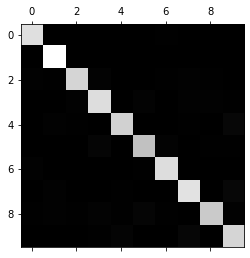

In [47]:
conf_mx = confusion_matrix(y_train, y_scores)
print(conf_mx)
plt.matshow(conf_mx, cmap='gray')

In [107]:
print(classification_report(y_train, y_scores))

              precision    recall  f1-score   support

           0       0.96      0.98      0.97      5923
           1       0.96      0.99      0.97      6742
           2       0.96      0.93      0.95      5958
           3       0.93      0.94      0.94      6131
           4       0.96      0.93      0.94      5842
           5       0.93      0.93      0.93      5421
           6       0.96      0.97      0.97      5918
           7       0.94      0.94      0.94      6265
           8       0.96      0.90      0.93      5851
           9       0.90      0.93      0.92      5949

    accuracy                           0.95     60000
   macro avg       0.95      0.95      0.95     60000
weighted avg       0.95      0.95      0.95     60000



###### Error Analysis

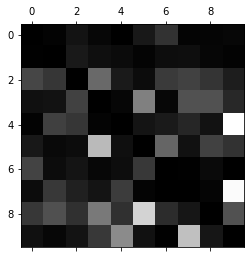

In [60]:
row_sums = conf_mx.sum(axis=1)
error_rate = conf_mx/row_sums
np.fill_diagonal(error_rate, 0)
plt.matshow(error_rate, cmap='gray')

##### Testing

In [6]:
X_test_scaled = std_scaler.transform(X_test)
y_pred = knn_clf.predict(X_test_scaled)

In [79]:
accuracy_score(y_test, y_pred)

0.9489

### Random Forest Clf

In [ ]:
from sklearn.ensemble import RandomForestClassifier

params = [
    {'n_estimators':[90, 180], 'max_features':[10, 20, 40]},
    {'bootstrap':[False], 'n_estimators':[90, 180], 'max_features':[10, 20, 40]}
]

forest_clf = RandomForestClassifier(random_state=42)
forest_cv = GridSearchCV(forest_clf, params, cv=3, verbose=2).fit(X_train, y_train)

In [10]:
forest_clf = forest_cv.best_estimator_

In [11]:
forest_cv.best_params_

{'bootstrap': False, 'max_features': 20, 'n_estimators': 180}

##### Evaluation

In [90]:
pd.DataFrame(forest_cv.cv_results_)

,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_max_features,param_n_estimators,param_bootstrap,params,split0_test_score,split1_test_score,split2_test_score,mean_test_score,std_test_score,rank_test_score
0,7.926316,0.307537,0.642320,0.014454,10,90,NaN,"{'max_features': 10, 'n_estimators': 90}",0.96150,0.96020,0.96370,0.961800,0.001445,12
1,16.464550,0.382882,1.324193,0.072558,10,180,NaN,"{'max_features': 10, 'n_estimators': 180}",0.96360,0.96125,0.96590,0.963583,0.001898,11
2,13.795162,0.170652,0.601534,0.010205,20,90,NaN,"{'max_features': 20, 'n_estimators': 90}",0.96425,0.96265,0.96500,0.963967,0.000980,10
3,27.442821,0.195301,1.162056,0.019947,20,180,NaN,"{'max_features': 20, 'n_estimators': 180}",0.96565,0.96340,0.96675,0.965267,0.001394,8
4,25.861307,0.257773,0.563145,0.002127,40,90,NaN,"{'max_features': 40, 'n_estimators': 90}",0.96500,0.96350,0.96585,0.964783,0.000972,9
5,51.547020,0.362096,1.131945,0.049570,40,180,NaN,"{'max_features': 40, 'n_estimators': 180}",0.96640,0.96430,0.96740,0.966033,0.001292,6
6,12.628412,0.029933,0.682270,0.000821,10,90,False,"{'bootstrap': False, 'max_features': 10, 'n_es...",0.96650,0.96400,0.96725,0.965917,0.001389,7
7,25.065653,0.149699,1.327060,0.022114,10,180,False,"{'bootstrap': False, 'max_features': 10, 'n_es...",0.96910,0.96575,0.96880,0.967883,0.001513,5
8,22.361658,0.432596,0.644764,0.014461,20,90,False,"{'bootstrap': False, 'max_features': 20, 'n_es...",0.96895,0.96720,0.96940,0.968517,0.000949,4
9,43.715329,0.615017,1.223729,0.021043,20,180,False,"{'bootstrap': False, 'max_features': 20, 'n_es...",0.97040,0.96765,0.97135,0.969800,0.001569,1


In [95]:
y_scores_forest = cross_val_predict(forest_clf, X_train, y_train, cv=3)

In [103]:
y_scores_forest

array([5, 0, 4, ..., 5, 6, 8], dtype=uint8)

In [106]:
print(classification_report(y_train, y_scores_forest))

              precision    recall  f1-score   support

           0       0.98      0.99      0.98      5923
           1       0.99      0.99      0.99      6742
           2       0.96      0.97      0.96      5958
           3       0.97      0.95      0.96      6131
           4       0.97      0.97      0.97      5842
           5       0.97      0.96      0.97      5421
           6       0.98      0.98      0.98      5918
           7       0.97      0.97      0.97      6265
           8       0.96      0.96      0.96      5851
           9       0.95      0.95      0.95      5949

    accuracy                           0.97     60000
   macro avg       0.97      0.97      0.97     60000
weighted avg       0.97      0.97      0.97     60000



##### Error Analysis

[[5825    3   16    6    0   18   41    4    4    6]
 [   1 6664   21   13    9    3   11   12    5    3]
 [  57   50 5562   89   21    9   47   57   42   24]
 [  13   17   54 5772    5   95    6   70   66   33]
 [   3   59   44    4 5441   15   21   33   15  207]
 [  20    9   10  155   12 5025   82   15   52   41]
 [  54   11   17    6   11   42 5768    1    8    0]
 [  10   53   26   17   48    3    0 5901    4  203]
 [  45   74   39  101   39  156   37   19 5274   67]
 [  13    7   16   47  111   13    1  164   18 5559]]


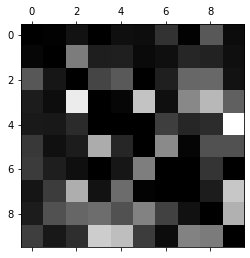

In [109]:
conf_mx_forest = confusion_matrix(y_train, y_scores_forest)
print(conf_mx)

row_sums = conf_mx_forest.sum(axis=1)
norm_conf_mx = conf_mx_forest/row_sums
np.fill_diagonal(norm_conf_mx, 0)
plt.matshow(norm_conf_mx, cmap='gray')

##### Testing

In [12]:
y_pred_forest = forest_clf.predict(X_test_scaled)
accuracy_score(y_test, y_pred_forest)

0.9733

In [13]:
import joblib
joblib.dump(forest_clf, 'model_97.pkl')

['model_97.pkl']

### ACCURACY SCORE ACHIEVED !!!!!